# Carregando a base de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t")
df.columns = ["label", "message"]

# Analisando a base de dados

In [3]:
df.shape

(5571, 2)

In [4]:
df['label'].value_counts()

ham     4824
spam     747
Name: label, dtype: int64

In [5]:
# Porcentagem de ham.
4824 / len(df), 
# Porcentagem de spam.
747 / len(df)

0.13408723747980614

In [6]:
df.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [7]:
df.tail()

,label,message
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...
5570,ham,Rofl. Its true to its name


<Figure size 576x432 with 0 Axes>

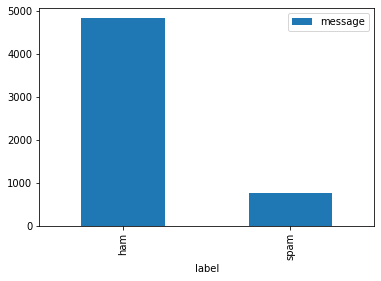

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.groupby('label').count().plot.bar(ylim=0)
plt.show()

# Estratificando o conjjunto de teste e de treino

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
stratify_ss = StratifiedShuffleSplit(test_size = 0.3, random_state = 33)
for x, y in stratify_ss.split(df, df['label']):
  train = df.iloc[x]
  test = df.iloc[y]

In [11]:
train.shape

(3899, 2)

In [12]:
 train['label'].value_counts()

ham     3376
spam     523
Name: label, dtype: int64

In [13]:
test.shape

(1672, 2)

In [14]:
test['label'].value_counts()

ham     1448
spam     224
Name: label, dtype: int64

In [15]:
X_train = train.message
X_test = test.message

In [16]:
X_train.shape

(3899,)

In [17]:
X_test.shape

(1672,)

In [18]:
X_train.head()

4020                   University of southern california.
5380           You have 1 new message. Call 0207-083-6089
3466    Actually fuck that, just do whatever, do find ...
4958                     Why didn't u call on your lunch?
5049    Edison has rightly said, "A fool can ask more ...
Name: message, dtype: object

In [19]:
train.head()

,label,message
4020,ham,University of southern california.
5380,spam,You have 1 new message. Call 0207-083-6089
3466,ham,"Actually fuck that, just do whatever, do find ..."
4958,ham,Why didn't u call on your lunch?
5049,ham,"Edison has rightly said, ""A fool can ask more ..."


In [20]:
X_test.head()

5011    You have WON a guaranteed £1000 cash or a £200...
1253    Mum say we wan to go then go... Then she can s...
5207                       Hi.what you think about match?
1257          Am also doing in cbe only. But have to pay.
2035        Simply sitting and watching match in office..
Name: message, dtype: object

<Figure size 576x432 with 0 Axes>

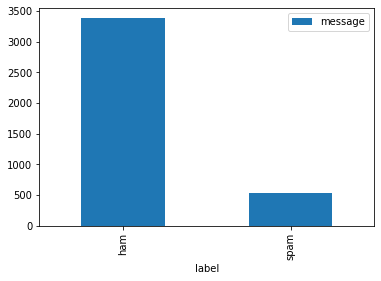

In [27]:
plt.figure(figsize=(8,6))
train.groupby('label').count().plot.bar(ylim=0)
plt.show()

<Figure size 576x432 with 0 Axes>

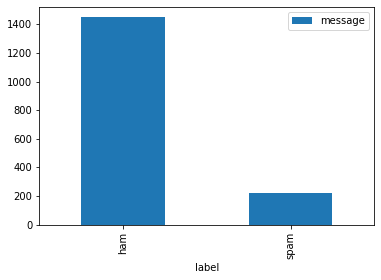

In [28]:
plt.figure(figsize=(8,6))
test.groupby('label').count().plot.bar(ylim=0)
plt.show()

# Aplicando o treinamento

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [22]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])

In [23]:
test.head()

,label,message
5011,spam,You have WON a guaranteed £1000 cash or a £200...
1253,ham,Mum say we wan to go then go... Then she can s...
5207,ham,Hi.what you think about match?
1257,ham,Am also doing in cbe only. But have to pay.
2035,ham,Simply sitting and watching match in office..


In [24]:
NB_pipeline.fit(X_train, train['label'])

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0,
                                                             class_pri

# Verificando a acurácia

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
prediction = NB_pipeline.predict(X_test)
'Test accuracy is {}'.format(accuracy_score(test['label'], prediction))

'Test accuracy is 0.9748803827751196'